### Phase 3: Data Cleaning and Preprocessing (shipments)

In [2]:
#Clean the Data

In [3]:
print(shipments_df.columns)


Index(['shipment_id', 'vendor_id', 'product_id', 'quantity', 'shipment_date',
       'status'],
      dtype='object')


In [4]:
import pandas as pd

shipments_df = pd.read_json('data/raw/shipments_2025_07_26.json')


In [6]:
shipments_df

,shipment_id,vendor_id,product_id,quantity,shipment_date,status
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,VENDOR_7,PRODUCT_1006,86,2025-07-09,on-time
1,bc8960a9-23b8-41e9-b924-56de3eb13b90,VENDOR_8,PRODUCT_1001,88,2025-06-30,on-time
2,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,VENDOR_1,PRODUCT_1000,37,2025-06-30,on-time
3,07a0ca6e-0822-48f3-ac03-1199972a8469,VENDOR_4,PRODUCT_1003,25,2025-06-30,on-time
4,9a1de644-815e-46d1-bb8f-aa1837f8a88b,VENDOR_8,PRODUCT_1010,8,2025-06-27,on-time
...,...,...,...,...,...,...
95,fbddcf7c-9c96-49ec-8d71-c366b41b3143,VENDOR_9,PRODUCT_1002,25,2025-07-21,delayed
96,8dfa6a56-d12d-4c9a-aaf9-15310200b1f0,VENDOR_3,PRODUCT_1010,51,2025-07-10,on-time
97,f05db76e-1a84-451a-a9d3-d7c7ee87905e,VENDOR_1,PRODUCT_1004,1,2025-07-02,delayed
98,1b66b5a9-e3c4-4657-9d8c-bbac43b409ef,VENDOR_10,PRODUCT_1006,18,2025-07-22,on-time


In [10]:
# Convert shipment_date to datetime
shipments_df['shipment_date'] = pd.to_datetime(shipments_df['shipment_date'], errors='coerce')


In [11]:
#Drop rows with missing or invalid shipment dates
shipments_df.dropna(subset=['shipment_date'], inplace=True)


In [12]:
#Validate quantity column
shipments_df = shipments_df[pd.to_numeric(shipments_df['quantity'], errors='coerce').notnull()]
shipments_df['quantity'] = shipments_df['quantity'].astype(int)
shipments_df = shipments_df[shipments_df['quantity'] > 0]


In [13]:
#Normalize status values (optional but good)
shipments_df['status'] = shipments_df['status'].str.strip().str.lower()


In [15]:
#reset index
shipments_df.reset_index(drop=True, inplace=True)


### Clean the vendors data 

In [18]:
vendors_df = pd.read_json('data/raw/vendors_2025_07_26.json')


In [19]:
# Inspect Columns
print(vendors_df.columns)


Index(['vendor_id', 'name', 'location', 'rating', 'contact_email'], dtype='object')


In [20]:
#Remove Duplicates
vendors_df = vendors_df.drop_duplicates()


In [21]:
#Check for Missing Values
print(vendors_df.isnull().sum())


vendor_id        0
name             0
location         0
rating           0
contact_email    0
dtype: int64


In [25]:
#Ensure Correct Data Types
print(vendors_df.dtypes)


vendor_id         object
name              object
location          object
rating           float64
contact_email     object
dtype: object


In [26]:
vendors_df['vendor_id'] = vendors_df['vendor_id'].astype(str)


In [27]:
#Strip Extra Spaces (Optional Standardization)
vendors_df['name'] = vendors_df['name'].str.strip()
vendors_df['location'] = vendors_df['location'].str.strip()


In [28]:
#Preview Cleaned Data
vendors_df.head()


,vendor_id,name,location,rating,contact_email
0,VENDOR_1,"Cooper, Watts and Farrell",Kington,3.3,waltersmaria@example.org
1,VENDOR_2,Cook and Sons,Evanmouth,8.6,hhoffman@example.org
2,VENDOR_3,"Mckee, Gardner and Davenport",South David,7.6,michael05@example.org
3,VENDOR_4,"Wright, Garcia and Deleon",Dicksonberg,6.9,michellecherry@example.org
4,VENDOR_5,Johnson-Doyle,Kimberlychester,6.7,josephcobb@example.org


In [29]:
vendors_df.isnull().sum()


vendor_id        0
name             0
location         0
rating           0
contact_email    0
dtype: int64

### Drop rows with missing values

In [30]:
vendors_df.dropna(inplace=True)


In [31]:
#Clean email field (optional but good practice)
vendors_df = vendors_df[vendors_df['contact_email'].str.contains('@', na=False)]


In [32]:
#Standardize column data types
vendors_df['rating'] = vendors_df['rating'].astype(float)
vendors_df['vendor_id'] = vendors_df['vendor_id'].astype(str)


In [33]:
#Remove duplicates
vendors_df.drop_duplicates(subset='vendor_id', inplace=True)


In [34]:
vendors_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vendor_id      10 non-null     object 
 1   name           10 non-null     object 
 2   location       10 non-null     object 
 3   rating         10 non-null     float64
 4   contact_email  10 non-null     object 
dtypes: float64(1), object(4)
memory usage: 532.0+ bytes


### Merge Shipments and Vendors

In [35]:
merged_df = pd.merge(shipments_df, vendors_df, on='vendor_id', how='left')


In [36]:
#Inspect the merged data
print(merged_df.shape)
merged_df.head()


(100, 10)


,shipment_id,vendor_id,product_id,quantity,shipment_date,status,name,location,rating,contact_email
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,VENDOR_7,PRODUCT_1006,86,2025-07-09,on-time,Johnson and Sons,Murphyland,3.1,michael86@example.net
1,bc8960a9-23b8-41e9-b924-56de3eb13b90,VENDOR_8,PRODUCT_1001,88,2025-06-30,on-time,"Rivera, Johnson and Wiley",Gregoryview,7.5,rodriguezryan@example.net
2,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,VENDOR_1,PRODUCT_1000,37,2025-06-30,on-time,"Cooper, Watts and Farrell",Kington,3.3,waltersmaria@example.org
3,07a0ca6e-0822-48f3-ac03-1199972a8469,VENDOR_4,PRODUCT_1003,25,2025-06-30,on-time,"Wright, Garcia and Deleon",Dicksonberg,6.9,michellecherry@example.org
4,9a1de644-815e-46d1-bb8f-aa1837f8a88b,VENDOR_8,PRODUCT_1010,8,2025-06-27,on-time,"Rivera, Johnson and Wiley",Gregoryview,7.5,rodriguezryan@example.net


In [37]:
merged_df.isnull().sum()


shipment_id      0
vendor_id        0
product_id       0
quantity         0
shipment_date    0
status           0
name             0
location         0
rating           0
contact_email    0
dtype: int64

### Exploratory Data Analysis (EDA) in Phase 3.

In [38]:
#Summary Statistics and Data Quality Checks
merged_df.describe(include='all')


,shipment_id,vendor_id,product_id,quantity,shipment_date,status,name,location,rating,contact_email
count,100,100,100,100.000000,100,100,100,100,100.000000,100
unique,100,10,11,NaN,NaN,2,10,10,NaN,10
top,bdd640fb-0667-4ad1-9c80-317fa3b1799d,VENDOR_10,PRODUCT_1006,NaN,NaN,delayed,"Mcdaniel, Bentley and Mclaughlin",West Ryan,NaN,cindy14@example.net
freq,1,17,14,NaN,NaN,51,17,17,NaN,17
mean,NaN,NaN,NaN,52.770000,2025-07-10 09:36:00,NaN,NaN,NaN,6.745000,NaN
min,NaN,NaN,NaN,1.000000,2025-06-26 00:00:00,NaN,NaN,NaN,3.100000,NaN
25%,NaN,NaN,NaN,23.750000,2025-07-02 18:00:00,NaN,NaN,NaN,6.700000,NaN
50%,NaN,NaN,NaN,58.000000,2025-07-10 00:00:00,NaN,NaN,NaN,7.500000,NaN
75%,NaN,NaN,NaN,79.000000,2025-07-19 00:00:00,NaN,NaN,NaN,7.800000,NaN
max,NaN,NaN,NaN,100.000000,2025-07-24 00:00:00,NaN,NaN,NaN,8.800000,NaN


In [41]:
#Check for duplicate shipment entries:
merged_df.duplicated(subset='shipment_id').sum()


np.int64(0)

In [42]:
#Check for missing values again:
merged_df.isnull().sum()


shipment_id      0
vendor_id        0
product_id       0
quantity         0
shipment_date    0
status           0
name             0
location         0
rating           0
contact_email    0
dtype: int64

### Shipment Status Distribution

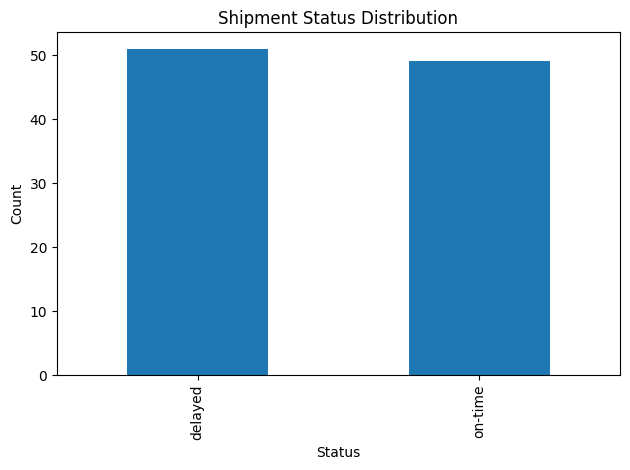

In [44]:
import matplotlib.pyplot as plt
merged_df['status'].value_counts().plot(kind='bar', title='Shipment Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Top Vendors by Shipment Count

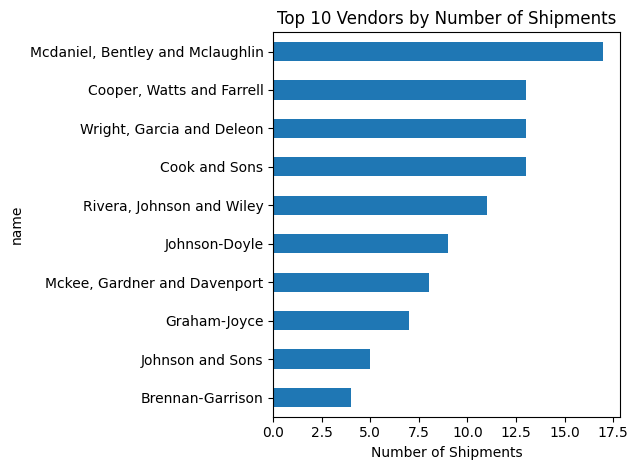

In [45]:
top_vendors = merged_df['name'].value_counts().head(10)
top_vendors.plot(kind='barh', title='Top 10 Vendors by Number of Shipments')
plt.xlabel('Number of Shipments')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [46]:
#Convert Shipment Date to Datetime
merged_df['shipment_date'] = pd.to_datetime(merged_df['shipment_date'])


In [47]:
merged_df['year'] = merged_df['shipment_date'].dt.year
merged_df['month'] = merged_df['shipment_date'].dt.month
merged_df['week'] = merged_df['shipment_date'].dt.isocalendar().week


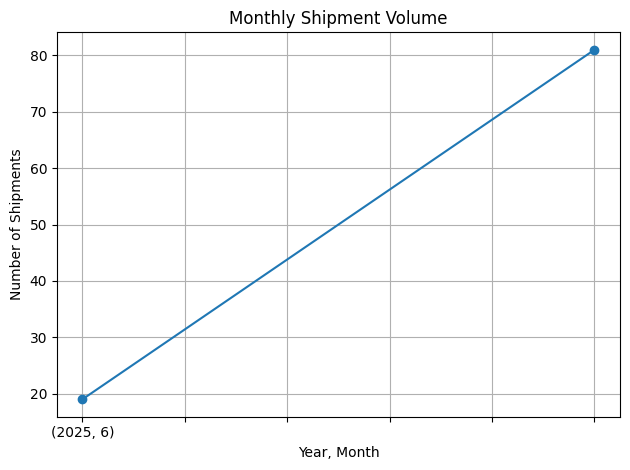

In [51]:
# Monthly Shipment Volume Trend
monthly_trend = merged_df.groupby(['year', 'month']).size()
monthly_trend.plot(kind='line', marker='o', title='Monthly Shipment Volume')
plt.xlabel('Year, Month')
plt.ylabel('Number of Shipments')
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
print(on_time_df.shape)


(0, 13)


In [54]:
print(merged_df['status'].unique())


['on-time' 'delayed']


In [55]:
merged_df[merged_df['status'] == 'Delivered']


,shipment_id,vendor_id,product_id,quantity,shipment_date,status,name,location,rating,contact_email,year,month,week


In [56]:
on_time_df = merged_df[merged_df['status'].str.strip().str.lower() == 'on-time']


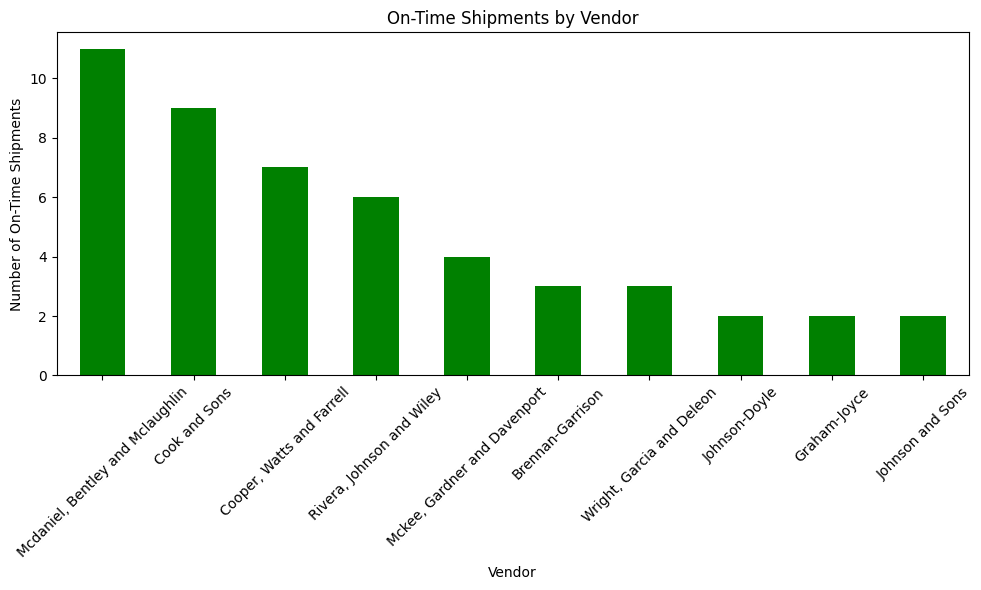

In [57]:
on_time_by_vendor = on_time_df.groupby('name').size().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
on_time_by_vendor.plot(kind='bar', color='green')
plt.title('On-Time Shipments by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Number of On-Time Shipments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
status_by_vendor = merged_df.groupby(['name', 'status']).size().unstack(fill_value=0)


### Plot Comparative Bar Chart

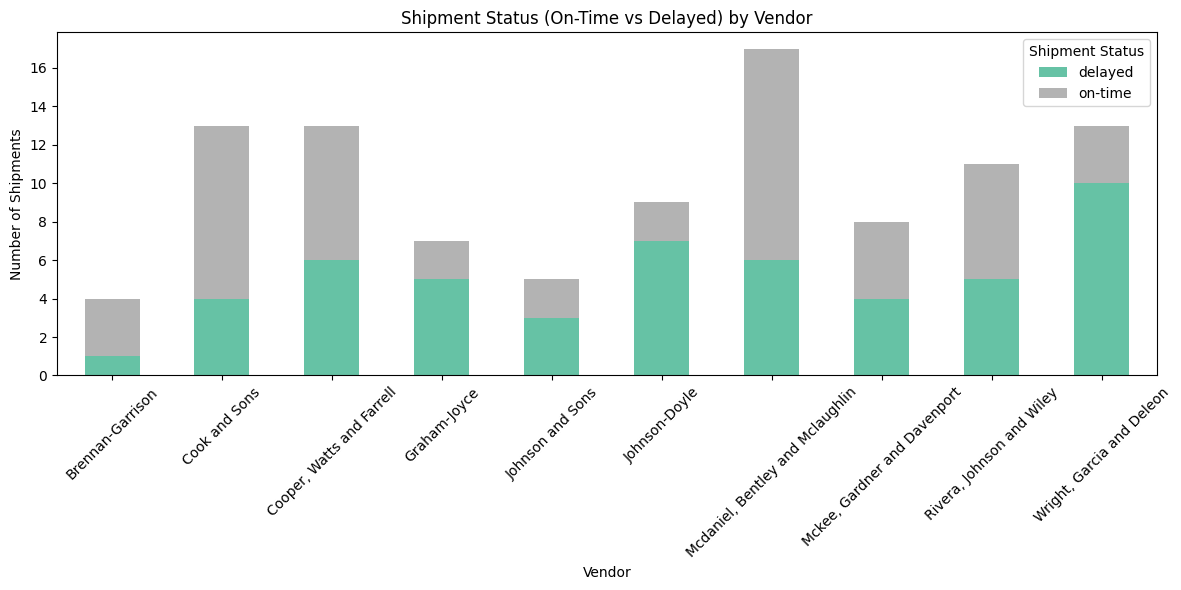

In [59]:
import matplotlib.pyplot as plt

# Plot
status_by_vendor.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Shipment Status (On-Time vs Delayed) by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.legend(title='Shipment Status')
plt.tight_layout()
plt.show()


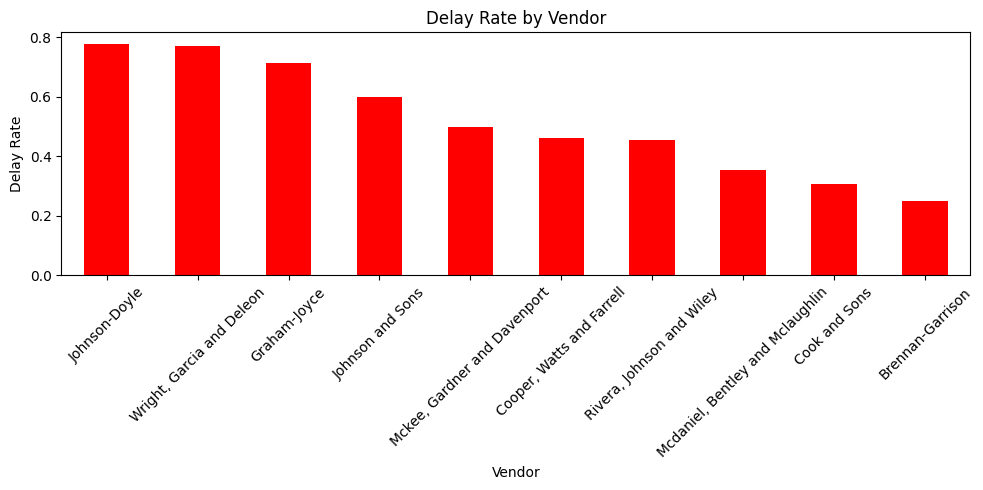

In [60]:
status_by_vendor['delay_rate'] = status_by_vendor['delayed'] / (status_by_vendor['delayed'] + status_by_vendor['on-time'])

# Plot delay rate
status_by_vendor['delay_rate'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='red')
plt.title('Delay Rate by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Delay Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
#Derive Insights & Export Results
total_shipments = len(merged_df)
on_time_shipments = len(merged_df[merged_df['status'] == 'on-time'])
delay_shipments = len(merged_df[merged_df['status'] == 'delayed'])
on_time_rate = round(on_time_shipments / total_shipments * 100, 2)

print(f"Total Shipments: {total_shipments}")
print(f"On-Time Shipments: {on_time_shipments}")
print(f"Delayed Shipments: {delay_shipments}")
print(f"Overall On-Time Rate: {on_time_rate}%")


Total Shipments: 100
On-Time Shipments: 49
Delayed Shipments: 51
Overall On-Time Rate: 49.0%


In [62]:
#Vendor-Level Insights
vendor_delay_rates = (
    merged_df.groupby('name')['status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .rename(columns={'on-time': 'on_time_rate', 'delayed': 'delay_rate'})
)

print(vendor_delay_rates.sort_values('delay_rate', ascending=False))


status                            delay_rate  on_time_rate
name                                                      
Johnson-Doyle                       0.777778      0.222222
Wright, Garcia and Deleon           0.769231      0.230769
Graham-Joyce                        0.714286      0.285714
Johnson and Sons                    0.600000      0.400000
Mckee, Gardner and Davenport        0.500000      0.500000
Cooper, Watts and Farrell           0.461538      0.538462
Rivera, Johnson and Wiley           0.454545      0.545455
Mcdaniel, Bentley and Mclaughlin    0.352941      0.647059
Cook and Sons                       0.307692      0.692308
Brennan-Garrison                    0.250000      0.750000


In [63]:
vendor_delay_rates.to_csv("vendor_shipment_performance.csv")


In [65]:
import os

# Create the folder if it doesn't exist
os.makedirs("data/processed", exist_ok=True)

# Save the merged DataFrame
merged_df.to_csv("data/processed/merged_shipments.csv", index=False)
print("Saved merged data to data/processed/merged_shipments.csv")


Saved merged data to data/processed/merged_shipments.csv
